

> ## Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.



## Business Goal

BUSINESS PROBLEM OVERVIEW
<hr />
Customer churn prediction is extremely important for any business as it recognizes the clients who are likely to stop using their services.

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyse customer-level data of a leading telecom firm, do exploratory data analysis to identify the main indicators why customers are leaving the company.




### OBJECTIVE
Customer churn occurs when customers stop doing business with a company.As the cost of retaining an existing customer is far less than acquiring a new one, maintaining a healthy customer base is important for the success of any business

### The main objective of project is to :


* Finding factors which influence customers to churn.

* Retain churn customers by applying strategy

* Providing offers based on influencing factors.

* Control churn rate and improve their image in the market.

### What is Churn Prediction?

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.



# Data summary

In [ ]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/AlmaBetter/project/EDA/Telecom Churn.csv")

In [ ]:
dataset.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [ ]:
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## Dataset column wise information:

* **State** :categorica for the 50 states

* **Account** Length :how long account has been active

* **Area Code** :Code Number of Area having some States included in each area code

* **lntl Plan** :International plan activated ( yes, no )

* **VMail Plan** :voice Mail plan activated ( yes ,no )

* **VMail Message** :No.of voice mail messages

* **Day Mins** :Total day minutes used

* **Day calls** :Total day calls made

* **Day Charge** :Total day charge

* **Eve Mins** :Total evening minutes

* **Eve Calls** :Total evening calls

* **Eve Charge** :Total evening charge

* **Night Mins** :Total night minutes

* **Night Calls** :Total night calls

* **Night Charge** :Total night charge

* **Intl Mins** :Total International minutes used

* **Intl Calls** :Total International calls made

* **Intl Charge** :Total International charge

* **CustServ calls** :Number of customer service caUs made

* **Churn** :Customer churn (Target Variable True=1, False=0)

In [ ]:
# find dataset shape(row and columns)
dataset.shape

(3333, 20)

In [ ]:
# check columns null values and datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# checking duplicate values in whole dataset
len(dataset[dataset.duplicated()])

0

* The dataset has ( 3333 row and 20 columns )
* It has not missing value
* Dataset has no duplicates values



In [ ]:
# find basic statistical information
dataset.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
# changing column name
dataset.set_axis(['State', 'Account_length', 'Area_code','International_plan','Voice_mail_plan','Number_vmail_messages','Total_day_minutes','Total_day_calls','Total_day_charge','Total_eve_minutes','Total_eve_calls','Total_eve_charge','Total_night_minutes','Total_night_calls','Total_night_charge','Total_intl_minutes','Total_intl_calls','Total_intl_charge','Customer_service_calls','Churn'], axis='columns', inplace=True)

In [ ]:
dataset.head(3)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


# **Exploratory Data Analysis**
project is to find chrun customer prediction of telecom company so the taget variable is chrun


### Dataset dependent and independent variable:

In [ ]:
dataset.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

number of churn is customer 483 and number of non churn customer is 2850 out of 3333 avalilable in data.


In [ ]:
# finding percentage of churn
percentage_of_churn_customer = (483/3333)*100
print(percentage_of_churn_customer,"%  churn custom available in whole dataset")
percentage_of_non_churn_customer=(2850/3333)*100
print(percentage_of_non_churn_customer,"%   non churn custom available in whole dataset")

14.491449144914492 %  churn custom available in whole dataset
85.5085508550855 %   non churn custom available in whole dataset


<Axes: ylabel='Churn'>

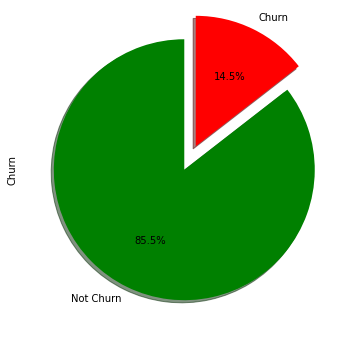

In [ ]:
#visualize of churn customer percentage
dataset['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['green','red'],
                               explode=[0,0.2]
                              )

### I have 14.5 churn cusomer which is not good for any company so i'll find dependent variable so that the company can take appropriate decesion for churn customer. 

### our target independent variable is churn column and rest column is independent variable.

## Exploring the dependent variable

## **State wise analysis:**

In [ ]:
# number of unique states
dataset["State"].nunique()

51

In [ ]:
# state wise chrun analysis
dataset.groupby(["State"])["Churn"].mean().head()

State
AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
Name: Churn, dtype: float64

<BarContainer object of 51 artists>

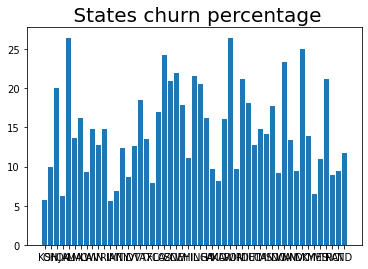

In [ ]:
state_churn=dataset.groupby(['State'])['Churn'].mean()*100
plt.title(" States churn percentage", fontsize = 20)
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(dataset['State'].unique(),state_churn)

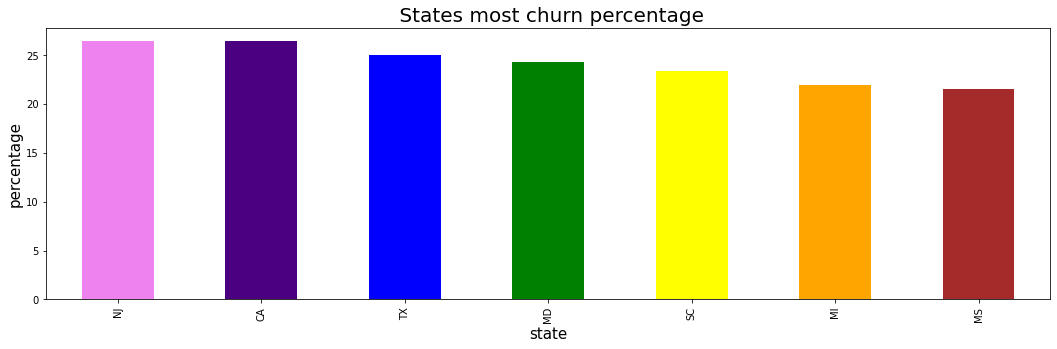

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (18, 5)
 
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby('State')['Churn'].mean())*100).sort_values(ascending = False).head(7).plot.bar(color = ['violet','indigo','blue','green','yellow','orange','brown'])
plt.title(" States most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

 ### there are 51 states which has different churn rate
 ### NJ,CA,TX,MD,SC most churn state which has more than 23% churn rate.

## **Account length Analysis:**
Account length is telecom service used duration which used by customer.

In [ ]:
dataset.head(3)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
dataset.Account_length.nunique()

212

In [ ]:
dataset.Account_length.value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: Account_length, Length: 212, dtype: int64

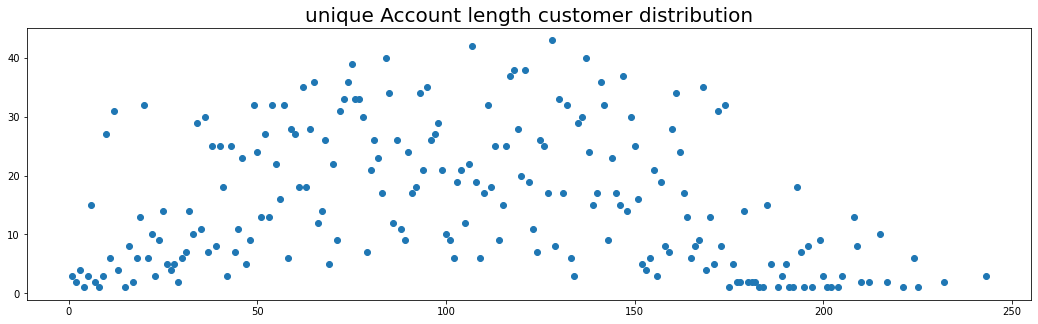

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y=dataset.Account_length.value_counts()
x=dataset['Account_length'].unique()
plt.title('unique Account length customer distribution',fontsize=(20))
plt.scatter(x, y)
plt.show()

`**scatter plot is very useful see distribution and above scatter plot expains unique account length customer distribution.**`

Account length is telecom company service used duration by the customer, so i can make some category based on customer service used duration.
1. new customer- Account length ( 0 to 15) days 
2. medium customer- Acoount length (16 to 150) days
3. old customer - Account length (151 or more) days

In [ ]:
dataset_fst=dataset[(dataset["Account_length"]> 0) & (dataset["Account_length"]< 11)]
dataset_scnd=dataset[(dataset["Account_length"]> 15) & (dataset["Account_length"]< 151)]
dataset_thrd=dataset[(dataset["Account_length"]> 150)]

### New customer churn rate:

In [ ]:
dataset_fst.shape

(27, 20)

In [ ]:
dataset_fst.loc[:,['Churn']].value_counts()

Churn
False    25
True      2
dtype: int64

In [ ]:
dataset_fst.groupby(["Account_length"])["Churn"].mean().head()

Account_length
1    0.125
2    1.000
3    0.000
4    0.000
5    0.000
Name: Churn, dtype: float64

<BarContainer object of 10 artists>

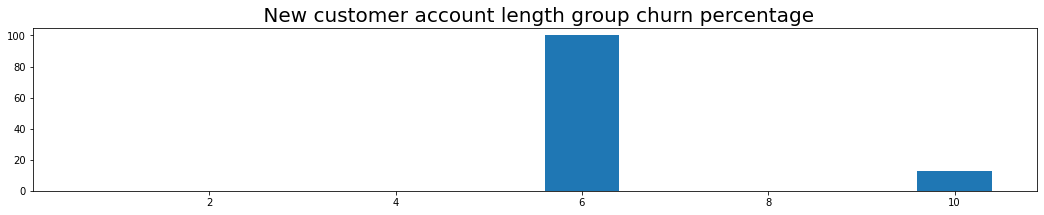

In [ ]:
fst_churn=dataset_fst.groupby(['Account_length'])['Churn'].mean()*100
plt.title(" New customer account length churn percentage", fontsize = 20)
plt.rcParams['figure.figsize'] = (18, 3)
plt.bar(dataset_fst['Account_length'].unique(),fst_churn)

New customer churn percentage


<Axes: ylabel='None'>

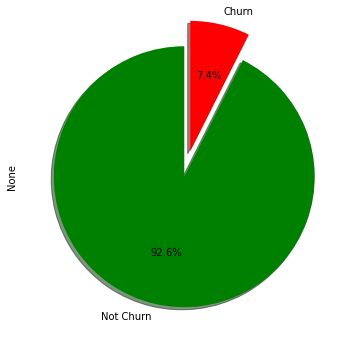

In [ ]:
#visualize of churn customer
print('New customer churn percentage')
dataset_fst.loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['green','red'],
                               explode=[0,0.2]
                              )

### Medium customer churn rate:

In [ ]:
dataset_scnd['Churn'].value_counts()

False    2506
True      425
Name: Churn, dtype: int64

In [ ]:
dataset_scnd.shape

(2931, 20)

In [ ]:
dataset_scnd.groupby(["Account_length"])["Churn"].mean().head()

Account_length
16    0.125
17    0.500
18    0.000
19    0.200
20    0.000
Name: Churn, dtype: float64

<BarContainer object of 135 artists>

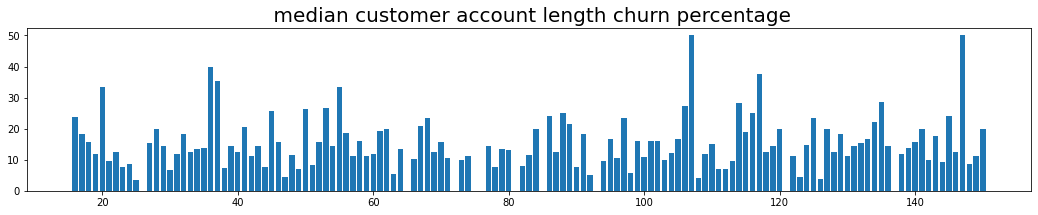

In [ ]:
fst_churn=dataset_scnd.groupby(['Account_length'])['Churn'].mean()*100
plt.title(" median customer account length churn percentage", fontsize = 20)
plt.rcParams['figure.figsize'] = (18, 3)
plt.bar(dataset_scnd['Account_length'].unique(),fst_churn)

<Axes: ylabel='None'>

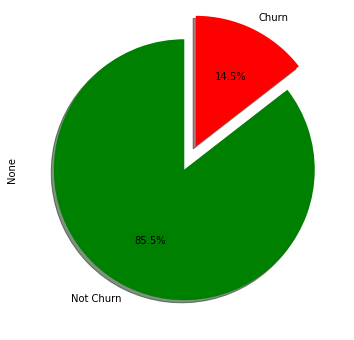

In [ ]:
#visualize of churn customer
dataset_scnd.loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['green','red'],
                               explode=[0,0.2]
                              )

### Old customer churn rate:

In [ ]:
dataset_thrd.shape

(356, 20)

In [ ]:
dataset_thrd['Churn'].value_counts()

False    302
True      54
Name: Churn, dtype: int64

In [ ]:
dataset_thrd.groupby(["Account_length"])["Churn"].mean().head()

Account_length
151    0.083333
152    0.250000
153    0.090909
154    0.375000
155    0.058824
Name: Churn, dtype: float64

<BarContainer object of 63 artists>

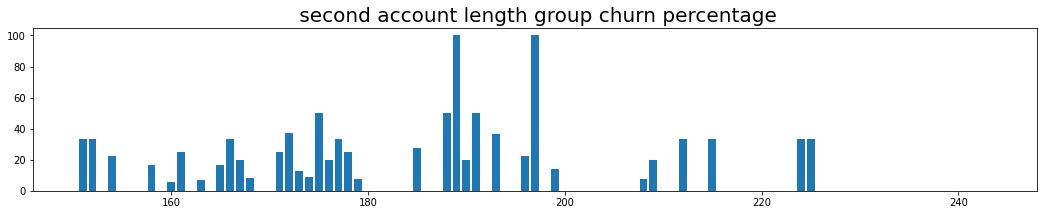

In [ ]:
fst_churn=dataset_thrd.groupby(['Account_length'])['Churn'].mean()*100
plt.title(" old customer account length churn percentage", fontsize = 20)
plt.rcParams['figure.figsize'] = (18, 3)
plt.bar(dataset_thrd['Account_length'].unique(),fst_churn)

<Axes: ylabel='None'>

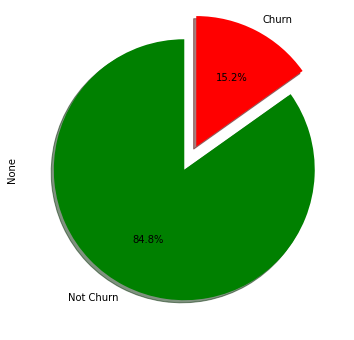

In [ ]:
#visualize of churn customer
dataset_thrd.loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['green','red'],
                               explode=[0,0.2]
                              )

### this pie chart helps us to find relationship between churn percentage customer in visuals form.

Above pie plot have made Account length chur relation clear:

* The new customer datset have a 7.4% churn rate of customers. to take a  hypothesis, new customers may have joined the customer service to test the quality of service, and as a result, 7.4% of new customers may not be satisfied with the service. Therefore, the company definitely needs to take better care of its services.

* median and old customer dataset has high churn rate 14.5 and 15.2 which is not good for comapny. median and old customer leaving the company servces it might be due to lack of extra benifits, not able to use better services. 




## **Area code**

In [ ]:
# checking how many unique area code available
dataset.Area_code.unique()

array([415, 408, 510])

In [ ]:
# number of churn in area
dataset.Area_code.value_counts()

415    1655
510     840
408     838
Name: Area_code, dtype: int64

In [ ]:
dataset.groupby(["Area_code"])["Churn"]

In [ ]:
dataset.groupby(["Area_code"])["Churn"].mean()*100

Area_code
408    14.558473
415    14.259819
510    14.880952
Name: Churn, dtype: float64

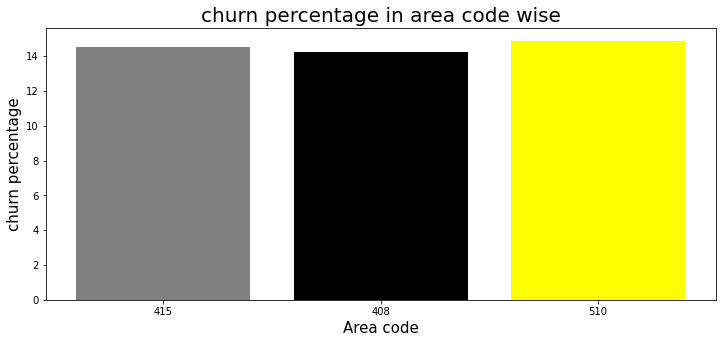

In [ ]:
a=list(['415','408','510'])
plt.bar(a,dataset.groupby(["Area_code"])["Churn"].mean()*100, color=['gray','black','yellow'])
plt.rcParams['figure.figsize'] = (7, 5)
plt.title("churn percentage in area code wise",fontsize = 20)
plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()

In [ ]:
dataset.groupby(["Area_code"])["Churn"].value_counts()

Area_code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64

histogram visulaise better with comaparsion all area code of churn percentage. all area code have same around 14% churn rate so area code has not any contribution in churn. 

## **International plan Analysis**

In [ ]:
y=dataset.International_plan.value_counts()

In [ ]:
dataset.head(2)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


<Axes: ylabel='International_plan'>

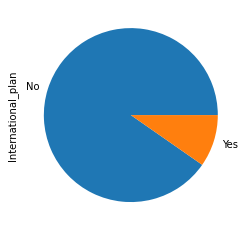

In [ ]:
dataset.International_plan.value_counts().plot(kind='pie', y='points',figsize=(6,4))

In [ ]:
dataset.groupby(["International_plan"])['Churn'].value_counts()

International_plan  Churn
No                  False    2664
                    True      346
Yes                 False     186
                    True      137
Name: Churn, dtype: int64

#### we can see it has huge differance in churn rate which has international plan and not having plan
#### so well analyse both seprately.

In [ ]:
plan_No=dataset[dataset['International_plan']=='No']
plan_yes=dataset[dataset['International_plan']=='Yes']

### **churn customer which has no international plan:**

In [ ]:
plan_No.Churn.value_counts()

False    2664
True      346
Name: Churn, dtype: int64

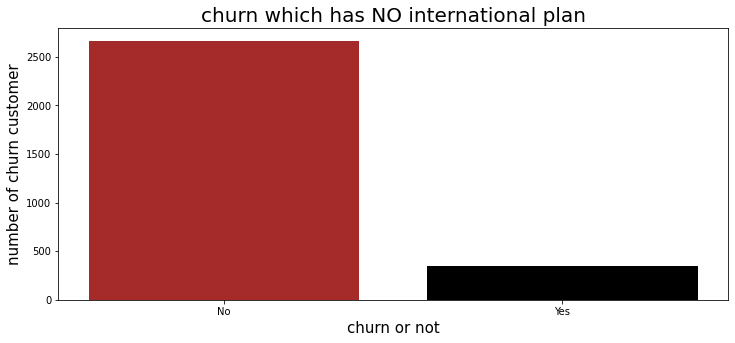

In [ ]:
a=(['No','Yes'])
plt.bar(a,plan_No.Churn.value_counts(), color=['brown','black'])
plt.rcParams['figure.figsize'] = (12, 5)
plt.title("churn which has NO international plan",fontsize = 20)
plt.xlabel('churn or not', fontsize = 15)
plt.ylabel('number of churn customer', fontsize = 15)
plt.show()

<Axes: title={'center': 'churn customer persentage which has not international plan'}, ylabel='None'>

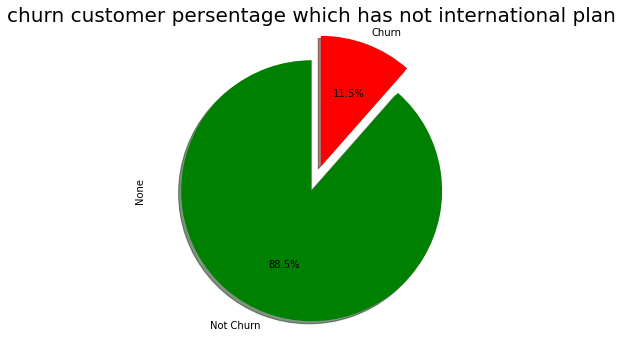

In [ ]:
#visualize of churn customer
plt.title('churn customer persentage which has not international plan',fontsize=20)
plan_No.loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['green','red'],
                               explode=[0,0.2]
                              )

### **churn customer which has international plan:**

In [ ]:
plan_yes.Churn.value_counts()

False    186
True     137
Name: Churn, dtype: int64

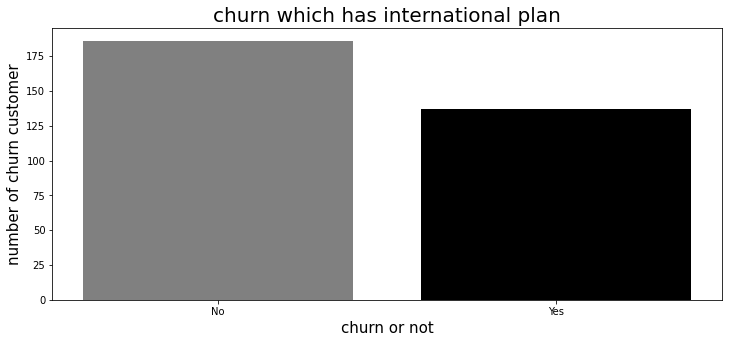

In [ ]:
a=(['No','Yes'])
plt.bar(a,plan_yes.Churn.value_counts(), color=['gray','black'])
plt.rcParams['figure.figsize'] = (12, 5)
plt.title("churn which has international plan",fontsize = 20)
plt.xlabel('churn or not', fontsize = 15)
plt.ylabel('number of churn customer', fontsize = 15)
plt.show()

<Axes: title={'center': 'churn customer persentage which has international plan'}, ylabel='None'>

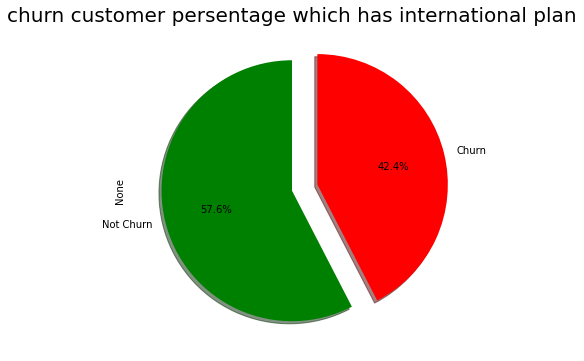

In [ ]:
#visualize of churn customer
plt.title('churn customer persentage which has international plan',fontsize=20)
plan_yes.loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['green','red'],
                               explode=[0,0.2]
                              )

above customer pie chart giving us beetter percentag comparision understanding  between customer which has international plan and which has not interational plan.
* we can see international plan having customer has more churn percentage, internatinal plan user feeling some issues so we have to findout why they are leaving the company.
* lets analyse other factor for international pack having customer  

### Analyse other fector for international customer:



In [ ]:
# creating new dataset for internation pack customer
data_inter=dataset[dataset['International_plan']=='Yes']

In [ ]:
print(data_inter.groupby(["Churn"])['Total_day_minutes'].mean())

Churn
False    183.833871
True     193.625547
Name: Total_day_minutes, dtype: float64


In [ ]:
print('Total_day_calls',data_inter.groupby(["Churn"])['Total_day_calls'].mean())

Total_day_calls Churn
False    102.053763
True      98.781022
Name: Total_day_calls, dtype: float64


In [ ]:
print('Total_day_charge',data_inter.groupby(["Churn"])['Total_day_charge'].mean())

Total_day_charge Churn
False    31.252419
True     32.916861
Name: Total_day_charge, dtype: float64


In [ ]:
print('Total_night_minutes',data_inter.groupby(["Churn"])['Total_night_minutes'].mean())

Total_night_minutes Churn
False    197.713978
True     194.640146
Name: Total_night_minutes, dtype: float64


In [ ]:
print('Total_night_calls',data_inter.groupby(["Churn"])['Total_night_calls'].mean())

Total_night_calls Churn
False    100.774194
True     100.956204
Name: Total_night_calls, dtype: float64


In [ ]:
print('Total_night_charge',data_inter.groupby(["Churn"])['Total_night_charge'].mean())

Total_night_charge Churn
False    8.897151
True     8.758832
Name: Total_night_charge, dtype: float64


In [ ]:
# initialize list of lists 
fact = [['Total day minutes',183.833871 ,  193.625547], ['Total_day_calls',102.053763,  98.781022],['Total_day_charge',31.252419,  32.916861],['Total_night_minutes',197.713978,  194.640146],['Total_night_calls',100.774194,  100.956204],['Total_night_charge',8.897151, 8.758832]] 

# Create the pandas DataFrame 
day_fact = pd.DataFrame(fact, columns = ['day/night of calls', 'not churn',' churn']) 

# print dataframe. 
day_fact

,day/night of calls,not churn,churn
0,Total day minutes,183.833871,193.625547
1,Total_day_calls,102.053763,98.781022
2,Total_day_charge,31.252419,32.916861
3,Total_night_minutes,197.713978,194.640146
4,Total_night_calls,100.774194,100.956204
5,Total_night_charge,8.897151,8.758832


### Other feature Histogram plot of international plan having customer:

<Axes: xlabel='day/night of calls', ylabel='international pack having customer'>

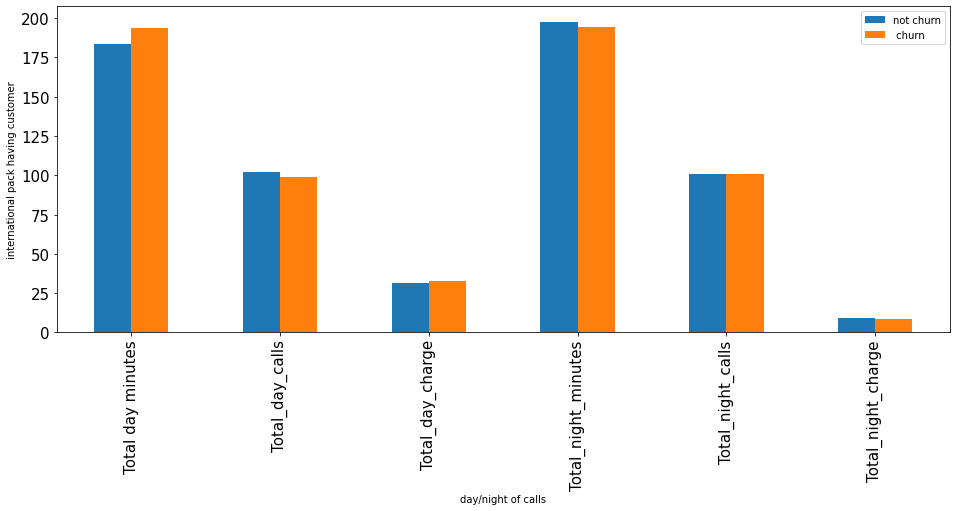

In [ ]:
# Vizualizing code for the above created dataframe
plt.rcParams['figure.figsize'] = (16, 6)
day_fact.plot(kind='bar', x='day/night of calls',ylabel='international pack having customer',fontsize=15)

### Analyse other feature for customer which has not international plan:

In [ ]:
# creating new dataset for internation pack customer
data_nointer=dataset[dataset['International_plan']=='No']

In [ ]:
print(data_nointer.groupby(["Churn"])['Total_day_minutes'].mean())

Churn
False    174.571246
True     212.175723
Name: Total_day_minutes, dtype: float64


In [ ]:
print('Total_day_calls',data_nointer.groupby(["Churn"])['Total_day_calls'].mean())

Total_day_calls Churn
False    100.159535
True     102.346821
Name: Total_day_calls, dtype: float64


In [ ]:
print('Total_day_charge',data_nointer.groupby(["Churn"])['Total_day_charge'].mean())

Total_day_charge Churn
False    29.677646
True     36.070405
Name: Total_day_charge, dtype: float64


In [ ]:
print('Total_night_minutes',data_nointer.groupby(["Churn"])['Total_night_minutes'].mean())

Total_night_minutes Churn
False    200.302102
True     209.425434
Name: Total_night_minutes, dtype: float64


In [ ]:
print('Total_night_calls',data_nointer.groupby(["Churn"])['Total_night_calls'].mean())

Total_night_calls Churn
False    100.008258
True     100.179191
Name: Total_night_calls, dtype: float64


In [ ]:
print('Total_night_charge',data_nointer.groupby(["Churn"])['Total_night_charge'].mean())

Total_night_charge Churn
False    9.013679
True     9.424277
Name: Total_night_charge, dtype: float64


In [ ]:
# initialize list of lists 
fact1 = [['Total day minutes',174.571246 ,  212.175723], ['Total_day_calls',100.159535,  102.346821],['Total_day_charge',29.677646,  36.070405],['Total_night_minutes',200.302102,  209.425434],['Total_night_calls',100.008258,  100.179191],['Total_night_charge',9.013679, 9.424277]] 

# Create the pandas DataFrame 
day_fact1 = pd.DataFrame(fact1, columns = ['day/night of calls', 'not churn',' churn']) 

# print dataframe. 
day_fact1

,day/night of calls,not churn,churn
0,Total day minutes,174.571246,212.175723
1,Total_day_calls,100.159535,102.346821
2,Total_day_charge,29.677646,36.070405
3,Total_night_minutes,200.302102,209.425434
4,Total_night_calls,100.008258,100.179191
5,Total_night_charge,9.013679,9.424277


### Other feature Histogram plot of international plan having customer:

<Axes: xlabel='day/night of calls', ylabel='Not international pack having customer'>

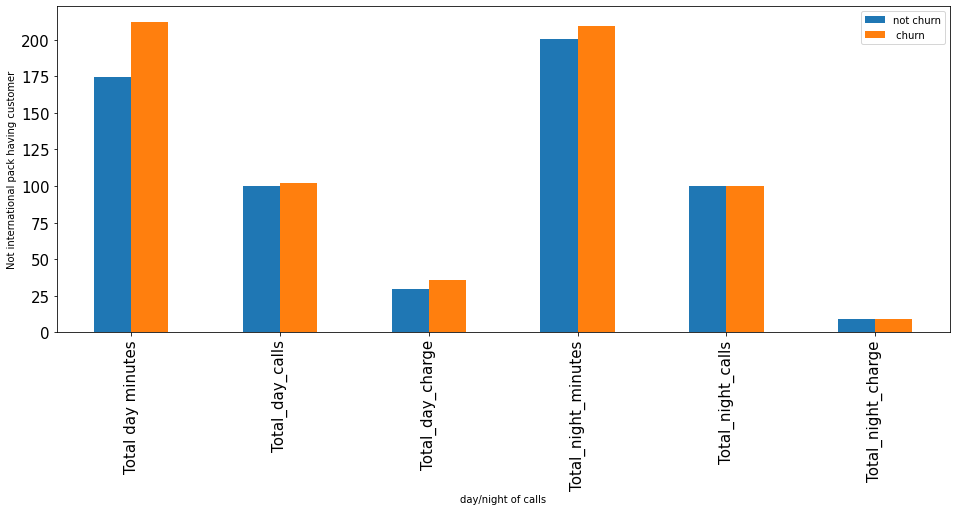

In [ ]:
# Vizualizing code for the above created dataframe
plt.rcParams['figure.figsize'] = (16, 6)
day_fact1.plot(kind='bar', x='day/night of calls',ylabel='Not international pack having customer',fontsize=15)

* To determine if any features related to international plans have any contribution to churn, we plotted histograms for all related features separately for customers with and without international plans.

* After analyzing both histogram plots, we found that customers with international plans make fewer daytime calls and have fewer total night minutes, yet pay the same amount as customers without international plans. Therefore, the final conclusion is that customers with international plans may need an additional plan to receive more benefits.

## **"Voice_mail_plan" feature analysis:**

In [ ]:
dataset.shape

(3333, 20)

In [ ]:
dataset.Voice_mail_plan.value_counts()

No     2411
Yes     922
Name: Voice_mail_plan, dtype: int64

<Axes: title={'center': 'have you voice mail pack?'}, ylabel='Voice_mail_plan'>

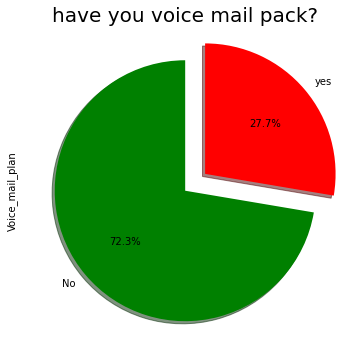

In [ ]:
#visualize of churn customer
plt.title('have you voice mail pack?',fontsize=20)
dataset['Voice_mail_plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','yes'],
                               colors=['green','red'],
                               explode=[0,0.2]
                              )

pie plot giving us visual undersatnding of percentage of voice mail plan customer. we have 27.7% customer which has voice mail plan and 72.3% customer not have voice male plan. 



In [ ]:
dataset.groupby('Voice_mail_plan')['Churn'].mean()*100

Voice_mail_plan
No     16.715056
Yes     8.676790
Name: Churn, dtype: float64

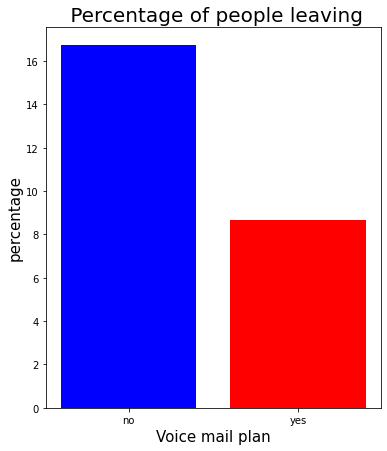

In [ ]:
# Vizualizing code for customers churning while having voice mail plan
lst=list(['no','yes'])
plt.rcParams['figure.figsize'] = (6, 7)
plt.bar(lst,dataset.groupby('Voice_mail_plan')['Churn'].mean()*100, color=['b','r'])
plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

Histogram plot of percentage of people leaving comapny services.
we can see voice mail plan having customer have very low churning rate but which do not have voice mail plan who is most churning rate.
* **hypothesis might be for voice mail plan customer:**
The customers who do not have a voice mail pack may not require it for voice mails, but they may want to send some emails. However, to send even a small number of emails, they have to purchase the pack, which the customer may not want to do. Therefore, the company should consider offering free services for sending some voice mails so that customers can send a few emails without any extra recharge.



## **Total days "minutes","call" and "charge" analysis:**

* The dataset have 12 features which is similar, three different service fetaures (minutes, calls and charges) and four slots of days (day,evening,ninght and intl) features:
1. Total_day_minutes, Total_day_calls and Total_day_charges
2. Total eve minutes, Total eve calls and Total eve charges
3. Total night minutes, Total ninght calls and Total night charges
4. Total intl minutes, Total intl calls and Toatal intl charges

### Multivariate analysis of three total days features.
1. Total_day_minutes
2. Total_day_calls 
3. Total_day_charges

In [ ]:
dataset.groupby('Churn')['Total_day_minutes'].mean()

Churn
False    175.175754
True     206.914079
Name: Total_day_minutes, dtype: float64

In [ ]:
dataset.groupby('Churn')['Total_day_calls'].mean()

Churn
False    100.283158
True     101.335404
Name: Total_day_calls, dtype: float64

In [ ]:
dataset.groupby('Churn')['Total_day_charge'].mean()

Churn
False    29.780421
True     35.175921
Name: Total_day_charge, dtype: float64

In [ ]:
# initialize list of lists 
days = [['Total day minutes',175.17 , 206.91], ['Total_day_calls',100.283158, 101.335404],['Total_day_charge',29.780421, 35.175921]] 

# Create the pandas DataFrame 
days_df = pd.DataFrame(days, columns = ['day', 'not churn',' churn']) 

# print dataframe. 
days_df

,day,not churn,churn
0,Total day minutes,175.170000,206.910000
1,Total_day_calls,100.283158,101.335404
2,Total_day_charge,29.780421,35.175921


### Multivariate analysis of three total evening features.
1. Total eve minutes
2. Total eve calls 
3. Total eve charges

In [ ]:
dataset.groupby('Churn')['Total_eve_minutes'].mean()

Churn
False    199.043298
True     212.410145
Name: Total_eve_minutes, dtype: float64

In [ ]:
dataset.groupby('Churn')['Total_eve_calls'].mean()

Churn
False    100.038596
True     100.561077
Name: Total_eve_calls, dtype: float64

In [ ]:
dataset.groupby('Churn')['Total_eve_charge'].mean()

Churn
False    16.918909
True     18.054969
Name: Total_eve_charge, dtype: float64

In [ ]:
# initialize list of lists 
eve = [['Total eve minutes',199.043298 , 212.410145], ['Total_eve_calls',100.038596, 100.561077],['Total_eve_charge',16.918909, 18.054969]] 

# Create the pandas DataFrame 
eve_df = pd.DataFrame(eve, columns = ['eve', 'not churn',' churn']) 

# print dataframe. 
eve_df

,eve,not churn,churn
0,Total eve minutes,199.043298,212.410145
1,Total_eve_calls,100.038596,100.561077
2,Total_eve_charge,16.918909,18.054969


### Multivariate analysis of three total night features.
1. Total night minutes
2. Total night calls 
3. Total night charges

In [ ]:
dataset.groupby('Churn')['Total_night_minutes'].mean()

Churn
False    200.133193
True     205.231677
Name: Total_night_minutes, dtype: float64

In [ ]:
dataset.groupby('Churn')['Total_night_calls'].mean()

Churn
False    100.058246
True     100.399586
Name: Total_night_calls, dtype: float64

In [ ]:
dataset.groupby('Churn')['Total_night_charge'].mean()

Churn
False    9.006074
True     9.235528
Name: Total_night_charge, dtype: float64

In [ ]:
# initialize list of lists 
night = [['Total_night_minutes',200.133193 , 205.231677], ['Total_night_calls', 100.058246, 100.399586],['Total_night_charge',9.006074, 9.235528]] 

# Create the pandas DataFrame 
night_df = pd.DataFrame(night, columns = ['night', 'not churn',' churn']) 

# print dataframe. 
night_df

,night,not churn,churn
0,Total_night_minutes,200.133193,205.231677
1,Total_night_calls,100.058246,100.399586
2,Total_night_charge,9.006074,9.235528


### Multivariate analysis of three total intl features.
1. Total intl minutes
2. Total intl calls 
3. Total intl charges

In [ ]:
dataset.groupby('Churn')['Total_intl_minutes'].mean()

Churn
False    10.158877
True     10.700000
Name: Total_intl_minutes, dtype: float64

In [ ]:
dataset.groupby('Churn')['Total_intl_calls'].mean()

Churn
False    4.532982
True     4.163561
Name: Total_intl_calls, dtype: float64

In [ ]:
dataset.groupby('Churn')['Total_intl_charge'].mean()

Churn
False    2.743404
True     2.889545
Name: Total_intl_charge, dtype: float64

In [ ]:
# initialize list of lists 
intl = [['Total_intl_minutes',10.158877 , 10.700000], ['Total_intl_calls', 4.532982, 4.163561],['Total_intl_charge',2.743404, 2.889545]] 

# Create the pandas DataFrame 
intl_df = pd.DataFrame(intl, columns = ['intl', 'not churn',' churn']) 

# print dataframe. 
intl_df

,intl,not churn,churn
0,Total_intl_minutes,10.158877,10.700000
1,Total_intl_calls,4.532982,4.163561
2,Total_intl_charge,2.743404,2.889545


### **Plotiing all days features churn  histogram:**

<Axes: title={'center': 'days carge minute and calls'}, xlabel='day', ylabel='mean'>

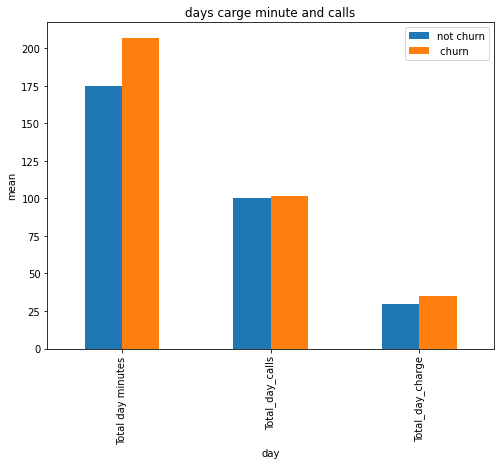

In [ ]:
# Vizualizing code for the above created dataframe
plt.rcParams['figure.figsize'] = (8, 6)
days_df.plot(kind='bar', x='day',ylabel='mean',title='days carge minute and calls')

<Axes: title={'center': 'eve carge minute and calls'}, xlabel='eve', ylabel='mean'>

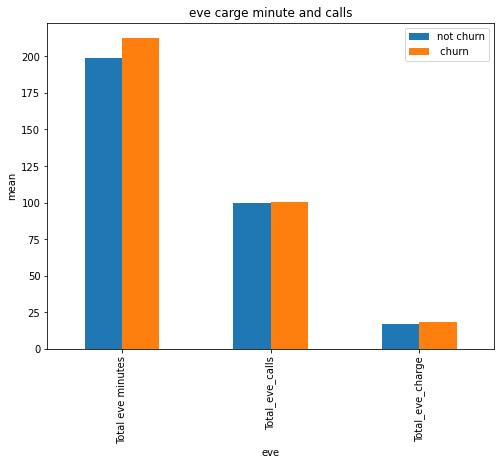

In [ ]:
# Vizualizing code for the above created dataframe
plt.rcParams['figure.figsize'] = (8, 6)
eve_df.plot(kind='bar', x='eve',ylabel='mean',title='eve carge minute and calls')

<Axes: title={'center': 'night carge minute and calls'}, xlabel='night', ylabel='mean'>

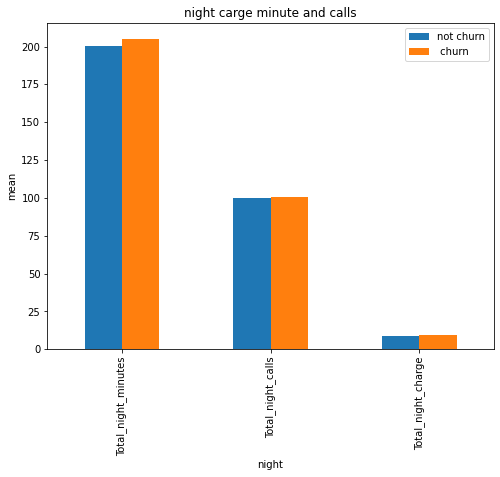

In [ ]:
# Vizualizing code for the above created dataframe
plt.rcParams['figure.figsize'] = (8, 6)
night_df.plot(kind='bar', x='night',ylabel='mean',title='night carge minute and calls')

<Axes: title={'center': 'intle carge,minute and calls'}, xlabel='intl', ylabel='mean'>

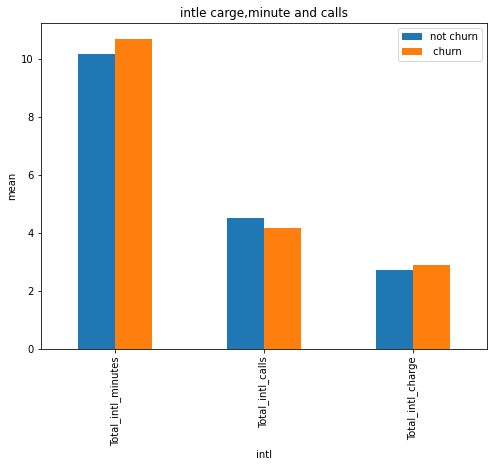

In [ ]:
# Vizualizing code for the above created dataframe
plt.rcParams['figure.figsize'] = (8, 6)
intl_df.plot(kind='bar', x='intl',ylabel='mean',title='intle carge,minute and calls')

* Plotted above all four histograms, we can visually understand that churn customers tend to talk more on calls, use more minutes of services, and pay more money compared to non-churn customers. Therefore, the company can create specialized offers for such individuals to decrease the churn rate.

## **Customer_service_calls**:

In [ ]:
dataset.Customer_service_calls.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer_service_calls, dtype: int64

In [ ]:
dataset.groupby('Customer_service_calls')['Churn'].mean()*100

Customer_service_calls
0     13.199426
1     10.330229
2     11.462451
3     10.256410
4     45.783133
5     60.606061
6     63.636364
7     55.555556
8     50.000000
9    100.000000
Name: Churn, dtype: float64

<BarContainer object of 10 artists>

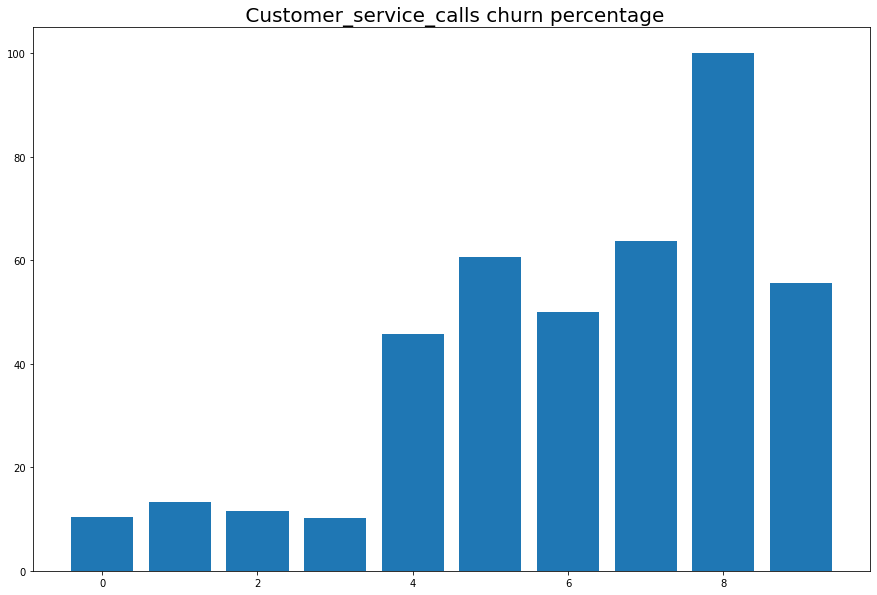

In [ ]:
cust=dataset.groupby('Customer_service_calls')['Churn'].mean()*100
plt.title(" Customer_service_calls churn percentage", fontsize = 20)
plt.rcParams['figure.figsize'] = (15, 10)
plt.bar(dataset['Customer_service_calls'].unique(),cust)

The histogram plot of the Customer_service_calls data indicates that customers who called more times to customer care have a higher churning rate, which suggests that the problems of churning customers are not being resolved adequately. Therefore, the company needs to take action to address the concerns raised by customers who make multiple calls

<ipython-input-213-e37789f28dd3>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


Text(0.5, 1.0, 'Correlation Heatmap')

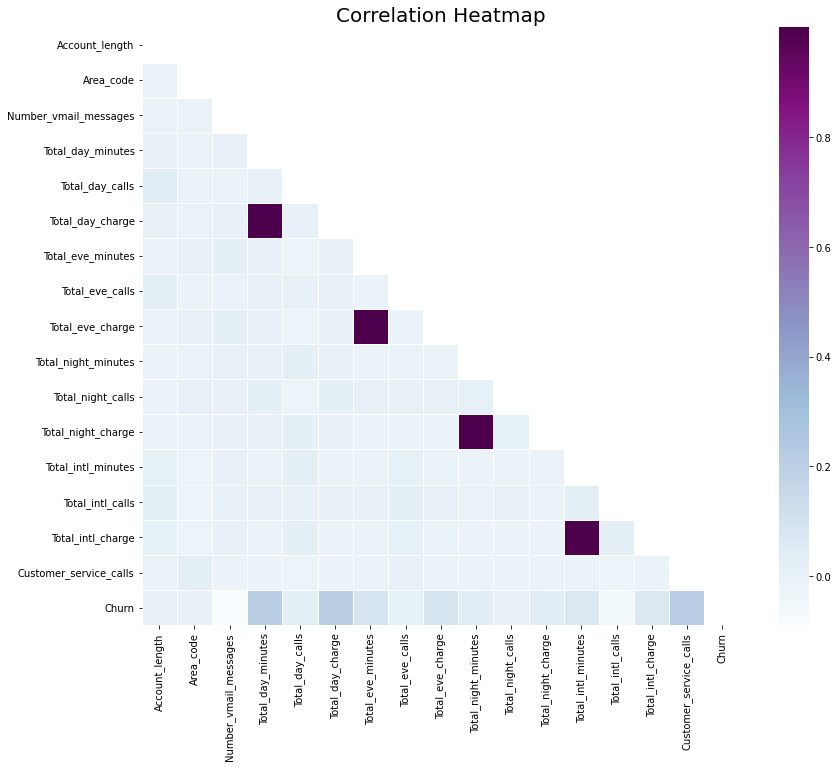

In [ ]:
corr=dataset.corr()
 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (14, 11))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

<Axes: >

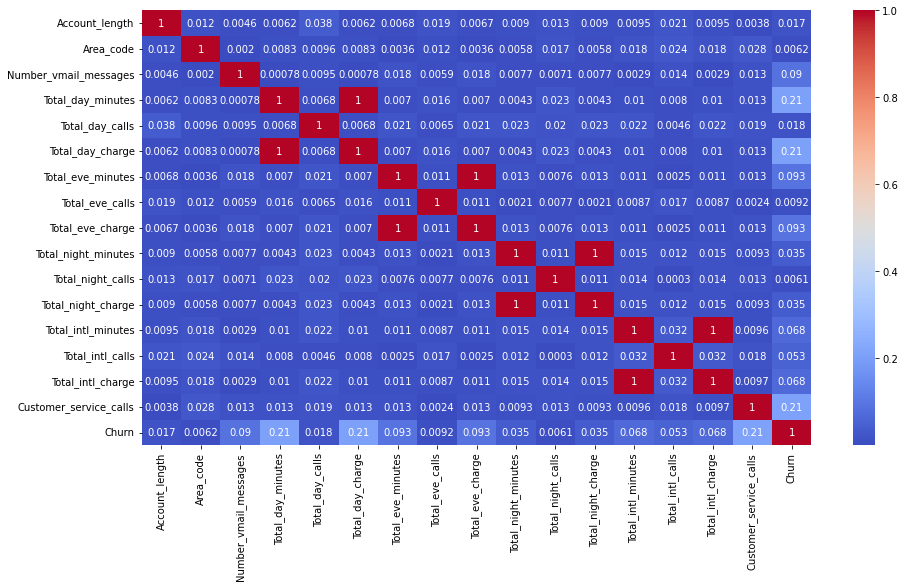

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **Pair plot**



In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset, hue="Churn")

plotted paiplot so that we can understand data correlation and relationship between features.

# **Solution to Reduce Customer Churn**

* Modify the pack plan and give some extra offers or benifits to internation plan user.
* Recommend investigating network coverage issues in states with high churning rates.
* NJ,CA,TX,MD,SC state have most churn rate which is more than 23% churn rate.
* Give better customer care sevice.
* Ask customers for feedback.
* Immediate action should be taken to resolve customer issues that have contacted more than four times to customer care.
* Consider modifying plans or offering extra benefits to customers with over 150 days of account tenure
* offer some free voice mail which do not have voice mail pack.
* Consider modifying the plan packages for customers who are using more services, spending more minutes on calls, and paying more money.


# **Conclusion:**

* International plan having customer more cahnces to leave the sevice.
* All states churning customer rate is almost similar but some states have very high churning rate which is more than 23%. 
* service user customer who have contacted customer care more than 4 times have high rate of churning.
* Account length having more than 150 customer churning rate is high.
* customer churning rate is high which has not voice mail plan pack.
* the customer who used more minutes services done more call and paid more money also have little more churn rate
